<a href="https://colab.research.google.com/github/Nidzoki/PMFSTMachineLearning/blob/main/v7/v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('/content/drive/MyDrive/penguins_size.csv')

In [7]:
data.shape

(344, 7)

In [8]:
data.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [9]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [11]:
categorical = ['species', 'island', 'sex']
numerical = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [12]:
for col in categorical:
  print(f"{col}: {data[col].unique()}")

species: ['Adelie' 'Chinstrap' 'Gentoo']
island: ['Torgersen' 'Biscoe' 'Dream']
sex: ['MALE' 'FEMALE' nan '.']


### Zadatak 1

In [13]:
data.duplicated().value_counts()

,count
False,344


In [14]:
data['sex'] = data['sex'].replace('.', np.nan)

In [15]:
data['sex'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

### Zadatak 2

In [16]:
data.isna().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [17]:
for col in numerical:
  data[col] = data[col].fillna(data[col].mean())

In [18]:
for col in categorical:
  data[col] = data[col].fillna(data[col].mode()[0])

In [19]:
data.isna().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


### Zadatak 3

In [20]:
def encode_sex_column(data):
  data['sex_encoded'] = data['sex'].map({'MALE': 0, 'FEMALE': 1})
  return data


In [21]:
def encode_island_column(data):
  data['island_encoded'] = data['island'].map({'Torgersen': 0, 'Biscoe': 1, 'Dream': 2})
  return data

In [22]:
def encode_species_column(data):
  data['species_encoded'] = data['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})
  return data

In [23]:
data = encode_sex_column(data)
data = encode_island_column(data)
data = encode_species_column(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
 7   sex_encoded        344 non-null    int64  
 8   island_encoded     344 non-null    int64  
 9   species_encoded    344 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 27.0+ KB


### Zadatak 4

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X, y = data.drop(['species', 'island', 'sex', 'species_encoded'], axis=1), data['species_encoded']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Zadatak 5

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X_train[numerical])

StandardScaler()

In [30]:
scaled_X_train = scaler.transform(X_train[numerical])

### Zadatak 6

In [31]:
from sklearn import  svm
from sklearn import metrics

In [32]:
svm_model = svm.SVC()
svm_model.fit(scaled_X_train, y_train)

SVC()

In [35]:
scaled_X_test = scaler.transform(X_test[numerical])
print("Accuracy: ", metrics.accuracy_score(y_test, svm_model.predict(scaled_X_test)))

Accuracy:  0.9711538461538461


In [55]:
# Select two features for plotting the decision boundary
plot_features = numerical[0:2] # Using 'culmen_length_mm' and 'culmen_depth_mm'

# Prepare 2D training data from the original X_train
X_train_plot_2d = X_train[plot_features]

# Scale the 2D data using a dedicated scaler for plotting
scaler_2d = StandardScaler()
scaled_X_train_plot_2d = scaler_2d.fit_transform(X_train_plot_2d)

# # Naučite na podacima (X, y) SVM s linearnom jezgrom
svc = svm.SVC(kernel='linear')
svc.fit(scaled_X_train_plot_2d, y_train)

# # Naučite na podacima (X, y) SVM s rbf jezgrom pri čemu se koristi gamma=0.7
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7)
rbf_svc.fit(scaled_X_train_plot_2d, y_train)

# # Naučite na podacima (X, y) SVM s rbf jezgrom pri čemu se koristi gamma=0.1
rbf_svc2 = svm.SVC(kernel='rbf', gamma=0.1)
rbf_svc2.fit(scaled_X_train_plot_2d, y_train)

# # Naučite na podacima (X, y) SVM s polinomijalnom jezgrom stupnja 3
poly_svc = svm.SVC(kernel='poly')
poly_svc.fit(scaled_X_train_plot_2d, y_train)

SVC(kernel='poly')

In [50]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['linear kernel',
          r'RBF kernel ($\gamma = 0.7$)',
          r'RBF kernel ($\gamma = 0.1$)',
          'polynomial (degree 3) kernel']

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


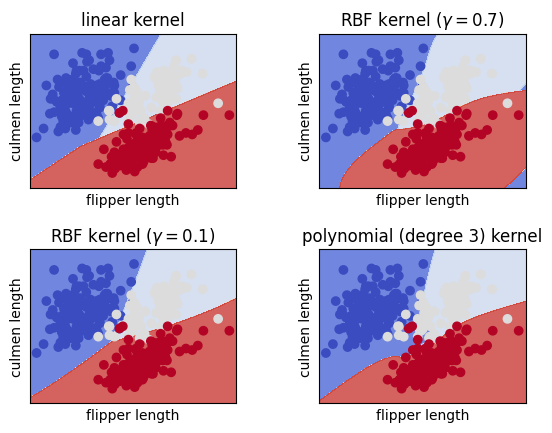

In [56]:
for i, clf in enumerate((svc, rbf_svc, rbf_svc2, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # Scale the meshgrid points before passing them to the predict method
    Z = clf.predict(scaler_2d.transform(np.c_[xx.ravel(), yy.ravel()]))

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('flipper length')
    plt.ylabel('culmen length')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()